In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
data = pd.read_excel(str("15-Points") + '.xlsx')

In [49]:
dist_matrix = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(i+1, num_cities):
        dist_matrix[i][j] = dist_matrix[j][i] = np.sqrt((data.iloc[i]['x'] - data.iloc[j]['x'])**2 + (data.iloc[i]['y'] - data.iloc[j]['y'])**2)


In [50]:
dist_matrix

array([[ 0.        , 28.87330006, 82.1295263 , 45.79853229, 68.35015748,
        52.07763037, 72.07872878, 42.02118426, 51.01660496, 54.99985149,
        28.72962105, 74.40947126, 22.71014783, 72.00534444, 45.46281016],
       [28.87330006,  0.        , 54.77322542, 45.6589604 , 42.02945447,
        43.21709674, 43.20558157, 22.76963429, 22.83126946, 30.61841561,
        40.63515089, 51.10681948, 10.39059841, 51.90414603, 20.33195751],
       [82.1295263 , 54.77322542,  0.        , 68.27106574, 45.67884154,
        54.76484963, 22.7582051 , 43.25551074, 40.72127506, 28.70629549,
        79.49407488, 20.41259831, 64.53727736, 30.80890945, 51.03909543],
       [45.79853229, 45.6589604 , 68.27106574,  0.        , 82.2889109 ,
        14.40183791, 72.08048339, 30.51648565, 62.13119423, 42.02542798,
        20.6351502 , 50.95841785, 51.16833511, 42.91122513, 64.53535684],
       [68.35015748, 42.02945447, 45.67884154, 82.2889109 ,  0.        ,
        74.25389315, 22.92069009, 52.13033984, 

In [51]:
def nearest_neighbor(dist_matrix, start_city):
    path = [start_city]
    unvisited_cities = set(range(num_cities))
    unvisited_cities.remove(start_city)
    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: dist_matrix[path[-1]][city])
        
        path.append(nearest_city)
 
        unvisited_cities.remove(nearest_city)
    path.append(start_city)
    return path

In [52]:
shortest_path = nearest_neighbor(dist_matrix, 0)
shortest_path

[0, 12, 1, 14, 8, 4, 6, 2, 11, 13, 9, 7, 5, 3, 10, 0]

In [53]:
print(f"The shortest path is {shortest_path} with total distance {sum(dist_matrix[i][j] for i,j in zip(shortest_path, shortest_path[1:])):.2f}")

The shortest path is [0, 12, 1, 14, 8, 4, 6, 2, 11, 13, 9, 7, 5, 3, 10, 0] with total distance 284.38


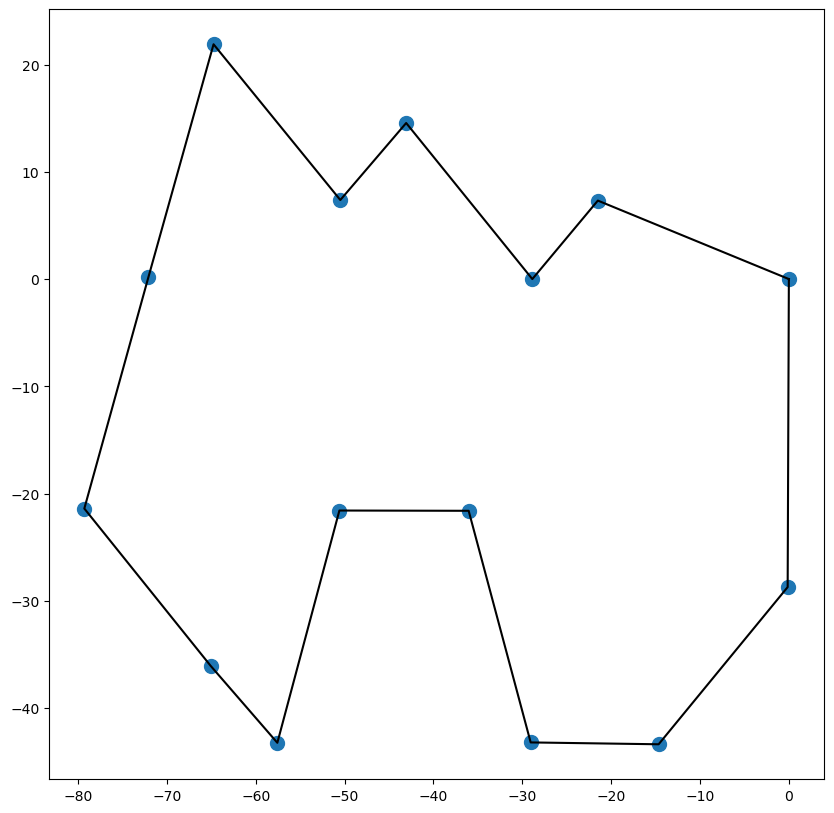

In [54]:
plt.figure(figsize=(10, 10))
plt.scatter(data['x'], data['y'], s=100)
plt.plot(data.iloc[shortest_path]['x'], data.iloc[shortest_path]['y'], color='black')
